# Segmentación de uso energético en hogares (Smart Grid)

Contexto real

Una compañía eléctrica quiere segmentar hogares según su patrón de consumo energético para:

Diseñar tarifas personalizadas

Identificar hogares eficientes vs. ineficientes

Priorizar inversiones en smart meters

Variables del dataset

consumo_medio_kwh

pico_consumo_kwh

variabilidad_consumo

num_personas

tamano_vivienda_m2

uso_electrodomesticos_intensivo (0–1)

Paso 1: Carga de librerías y datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('hogares_energia_kmeans.csv')

df.head()


,consumo_medio_kwh,pico_consumo_kwh,variabilidad_consumo,num_personas,tamano_vivienda_m2,uso_electrodomesticos_intensivo
0,409.605698,731.306126,0.177826,5,94.913206,1
1,333.408284,592.648615,0.267682,3,134.066582,0
2,427.722625,730.574376,0.195332,3,58.511119,0
3,532.763583,835.824507,0.222834,5,63.392787,0
4,321.901595,712.215018,0.417345,5,85.164814,0


Paso 2: EDA básico

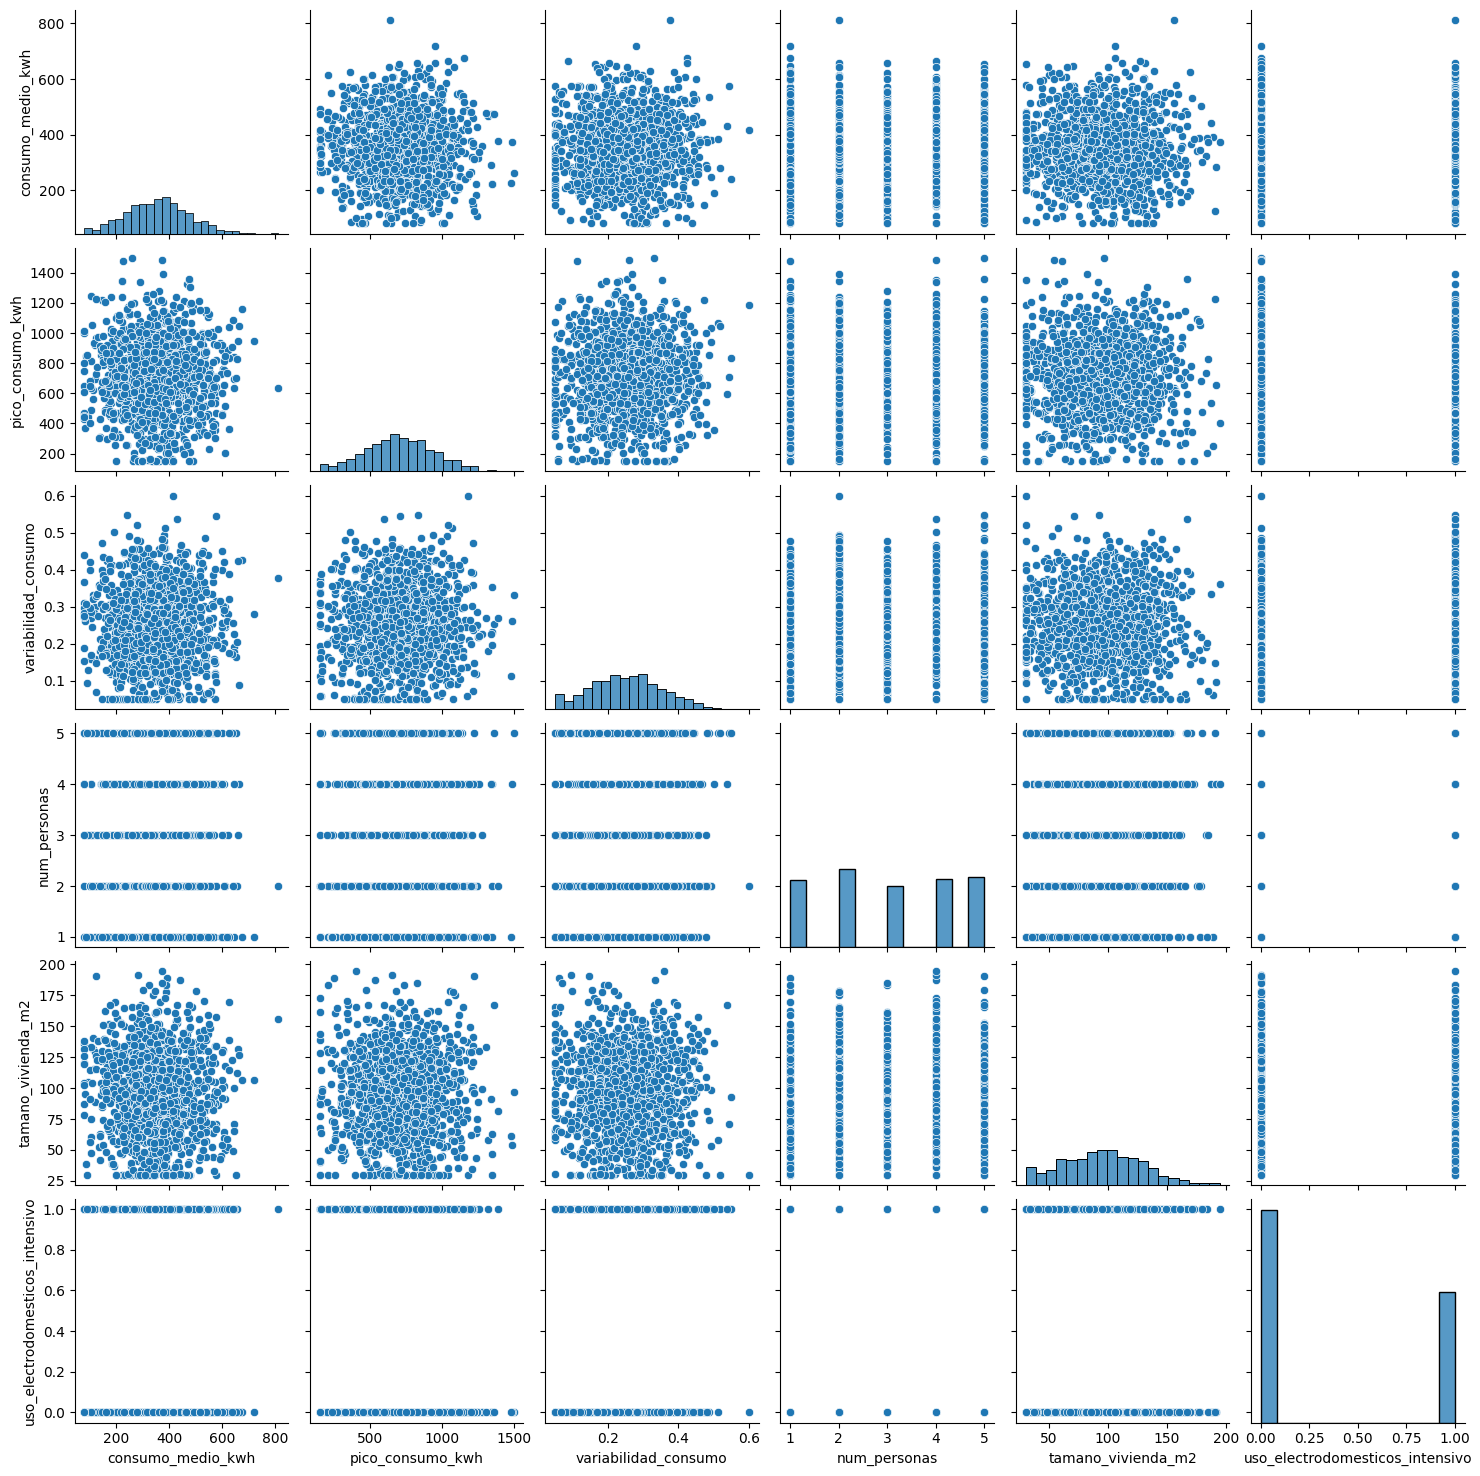

In [3]:
sns.pairplot(df)
plt.show()

Paso 3: Escalado de variables

In [4]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,consumo_medio_kwh,pico_consumo_kwh,variabilidad_consumo,num_personas,tamano_vivienda_m2,uso_electrodomesticos_intensivo
0,0.464672,0.098452,-0.746206,1.417207,-0.009562,1.277333
1,-0.183985,-0.473048,0.151415,0.008219,1.155747,-0.782881
2,0.618899,0.095436,-0.571331,0.008219,-1.092985,-0.782881
3,1.513097,0.529242,-0.296593,1.417207,-0.947694,-0.782881
4,-0.281940,0.019765,1.646485,1.417207,-0.299700,-0.782881


Paso 4: Método del codo

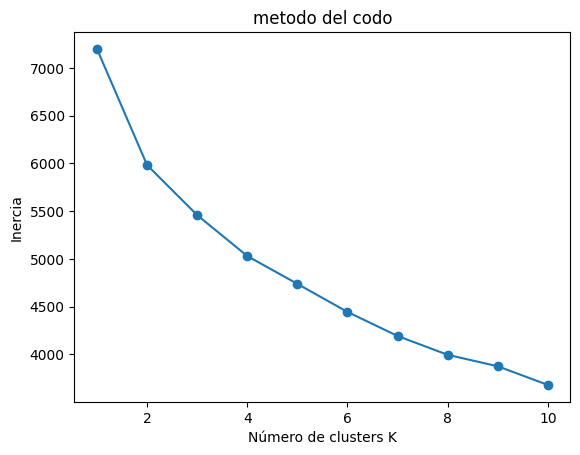

In [5]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('metodo del codo')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.show()

Paso 5: Entrenamiento final

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_
df['Cluster'].value_counts()

Cluster
1    455
2    392
0    353
Name: count, dtype: int64

Paso 6: Interpretación

In [31]:
df.groupby('Cluster').mean()

,consumo_medio_kwh,pico_consumo_kwh,variabilidad_consumo,num_personas,tamano_vivienda_m2,uso_electrodomesticos_intensivo
Cluster,,,,,,
0,369.848585,899.008652,0.294569,2.801700,99.096741,0.002833
1,364.552095,681.444447,0.258401,2.997802,93.716135,1.000000
2,330.605478,565.041729,0.207844,3.145408,93.518868,0.000000


In [ ]:
# 0 hogares grandes con consumo moderado pero con picos altos
# 1 hogares con uso intensivo de electrodomésticos
# 2 hogares pequeños con bajo consumo energético al no tener consumo intensivo

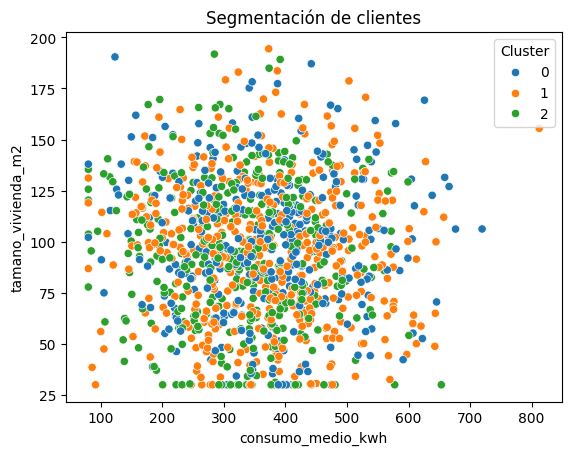

In [33]:
plt.figure()
sns.scatterplot(
    data=df,
    x="consumo_medio_kwh",
    y="tamano_vivienda_m2",
    hue="Cluster",
    palette="tab10"
)
plt.title("Segmentación de clientes")
plt.show()
